In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster import hierarchy 
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster
from scipy.spatial import distance_matrix 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
import pylab

In [2]:
source_df = pd.read_csv('../csvs/Iris.csv')
df = source_df.drop(['Species'], axis=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [3]:
x = df.values[:,1:]
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

# Using SciPy

In [4]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [5]:
Z = hierarchy.linkage(D, 'complete')
max_clust = 3
clusters = fcluster(Z, max_clust, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2], dtype=int32)

In [6]:
silhouette_avg = silhouette_score(D, clusters)
silhouette_avg

0.5941680390317883

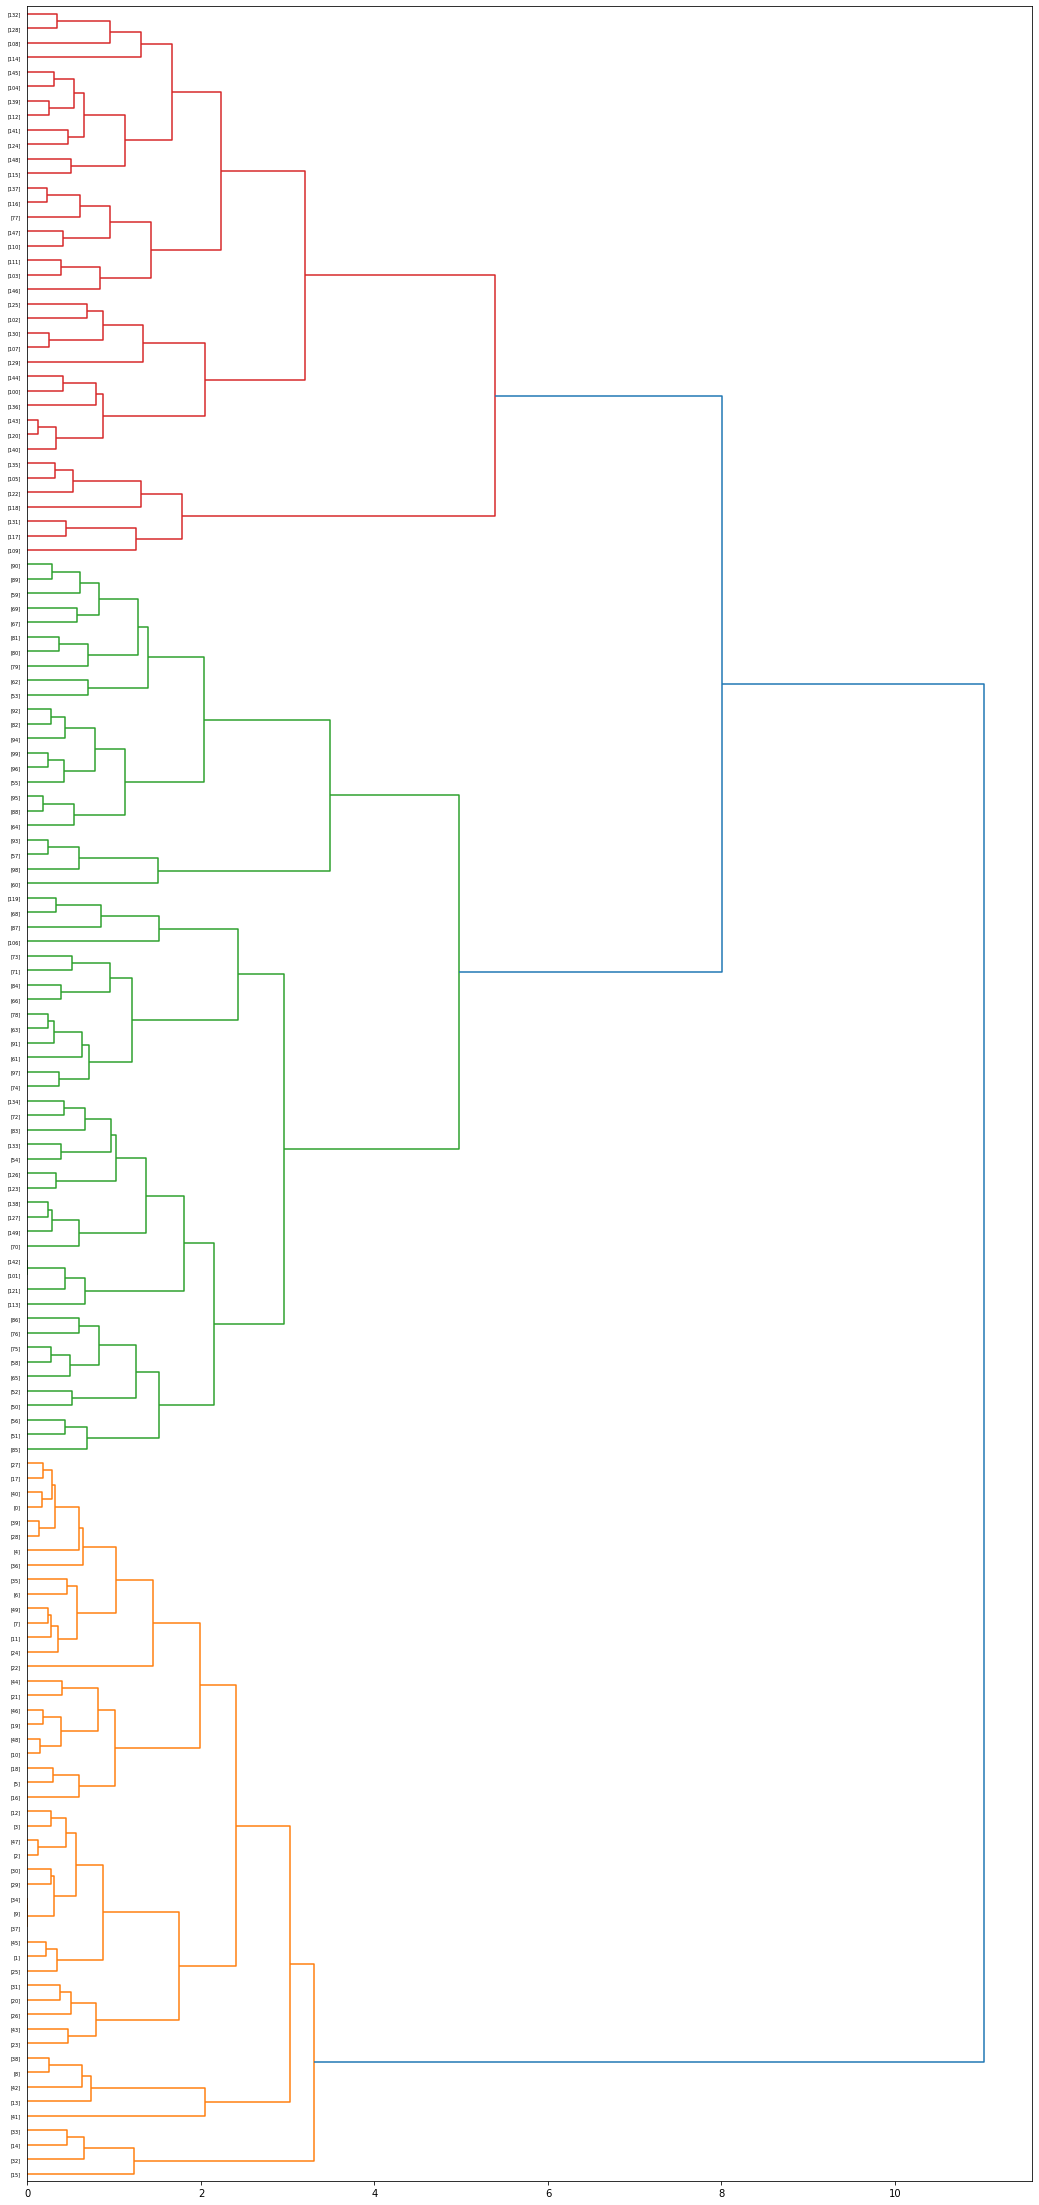

In [7]:
fig = pylab.figure(figsize=(18,40))
dendro = hierarchy.dendrogram(Z, leaf_label_func=(lambda id: '[%s]' %id), leaf_rotation=0,orientation = 'right')

In [8]:
df["SciPy_label"] = clusters
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SciPy_label
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


<AxesSubplot:>

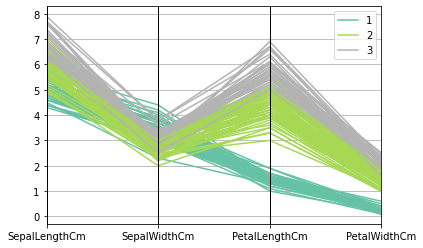

In [9]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

parallel_coordinates(df.drop('Id', axis=1), 'SciPy_label', colormap=plt.get_cmap("Set2"))

# Using SciKit-Learn

In [10]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


In [11]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int64)

In [12]:
mapping_dict = { 0: 'Iris-setosa', 1: 'Iris-virginica', 2:'Iris-versicolor'}
source_df["SciKit_Hierarchical_label"] = [mapping_dict[x] for x in agglom.labels_]
source_df['SciKit_eq'] = np.where(source_df["Species"] == source_df["SciKit_Hierarchical_label"], True, False)
source_df["SciKit_cluster"] = agglom.labels_
source_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SciKit_Hierarchical_label,SciKit_eq,SciKit_cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,True,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,True,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,True,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,True,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,True,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,True,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Iris-versicolor,False,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,True,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,True,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'SepalWidthCm')

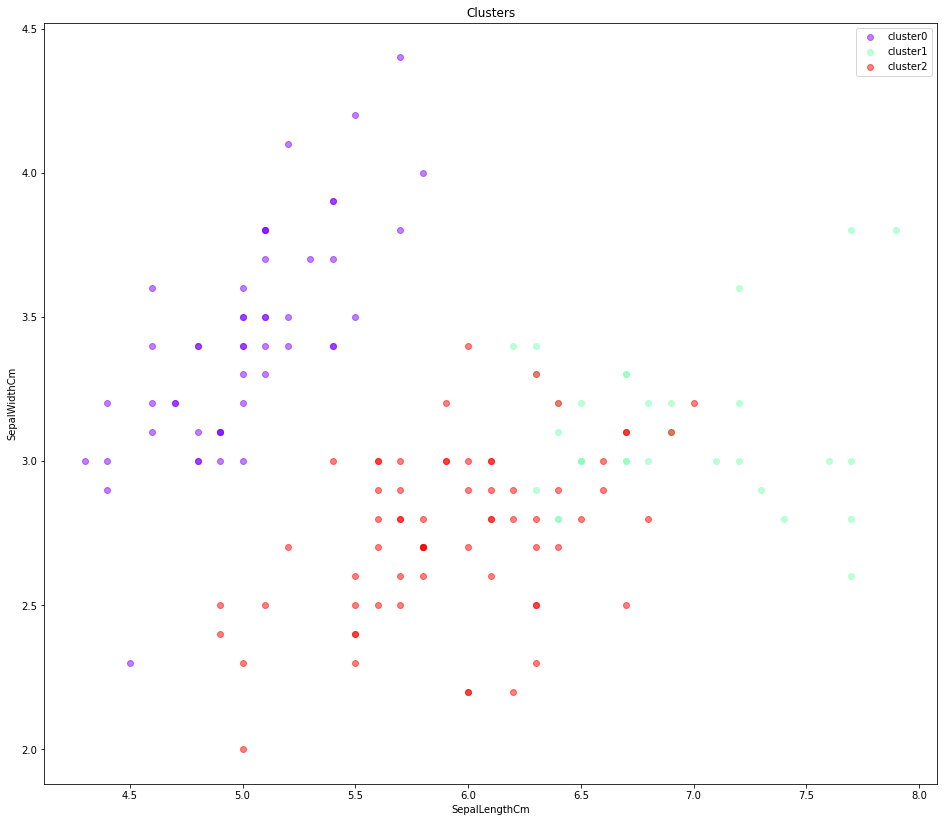

In [13]:
import matplotlib.cm as cm

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = source_df[source_df.SciKit_cluster == label]
    plt.scatter(subset.SepalLengthCm, subset.SepalWidthCm, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

# Using SciPy on different method

## single

In [14]:
Z = hierarchy.linkage(D, 'single')
max_clust = 3
clusters = fcluster(Z, max_clust, criterion='maxclust')
silhouette_avg = silhouette_score(D, clusters)
silhouette_avg

0.5597396020599303

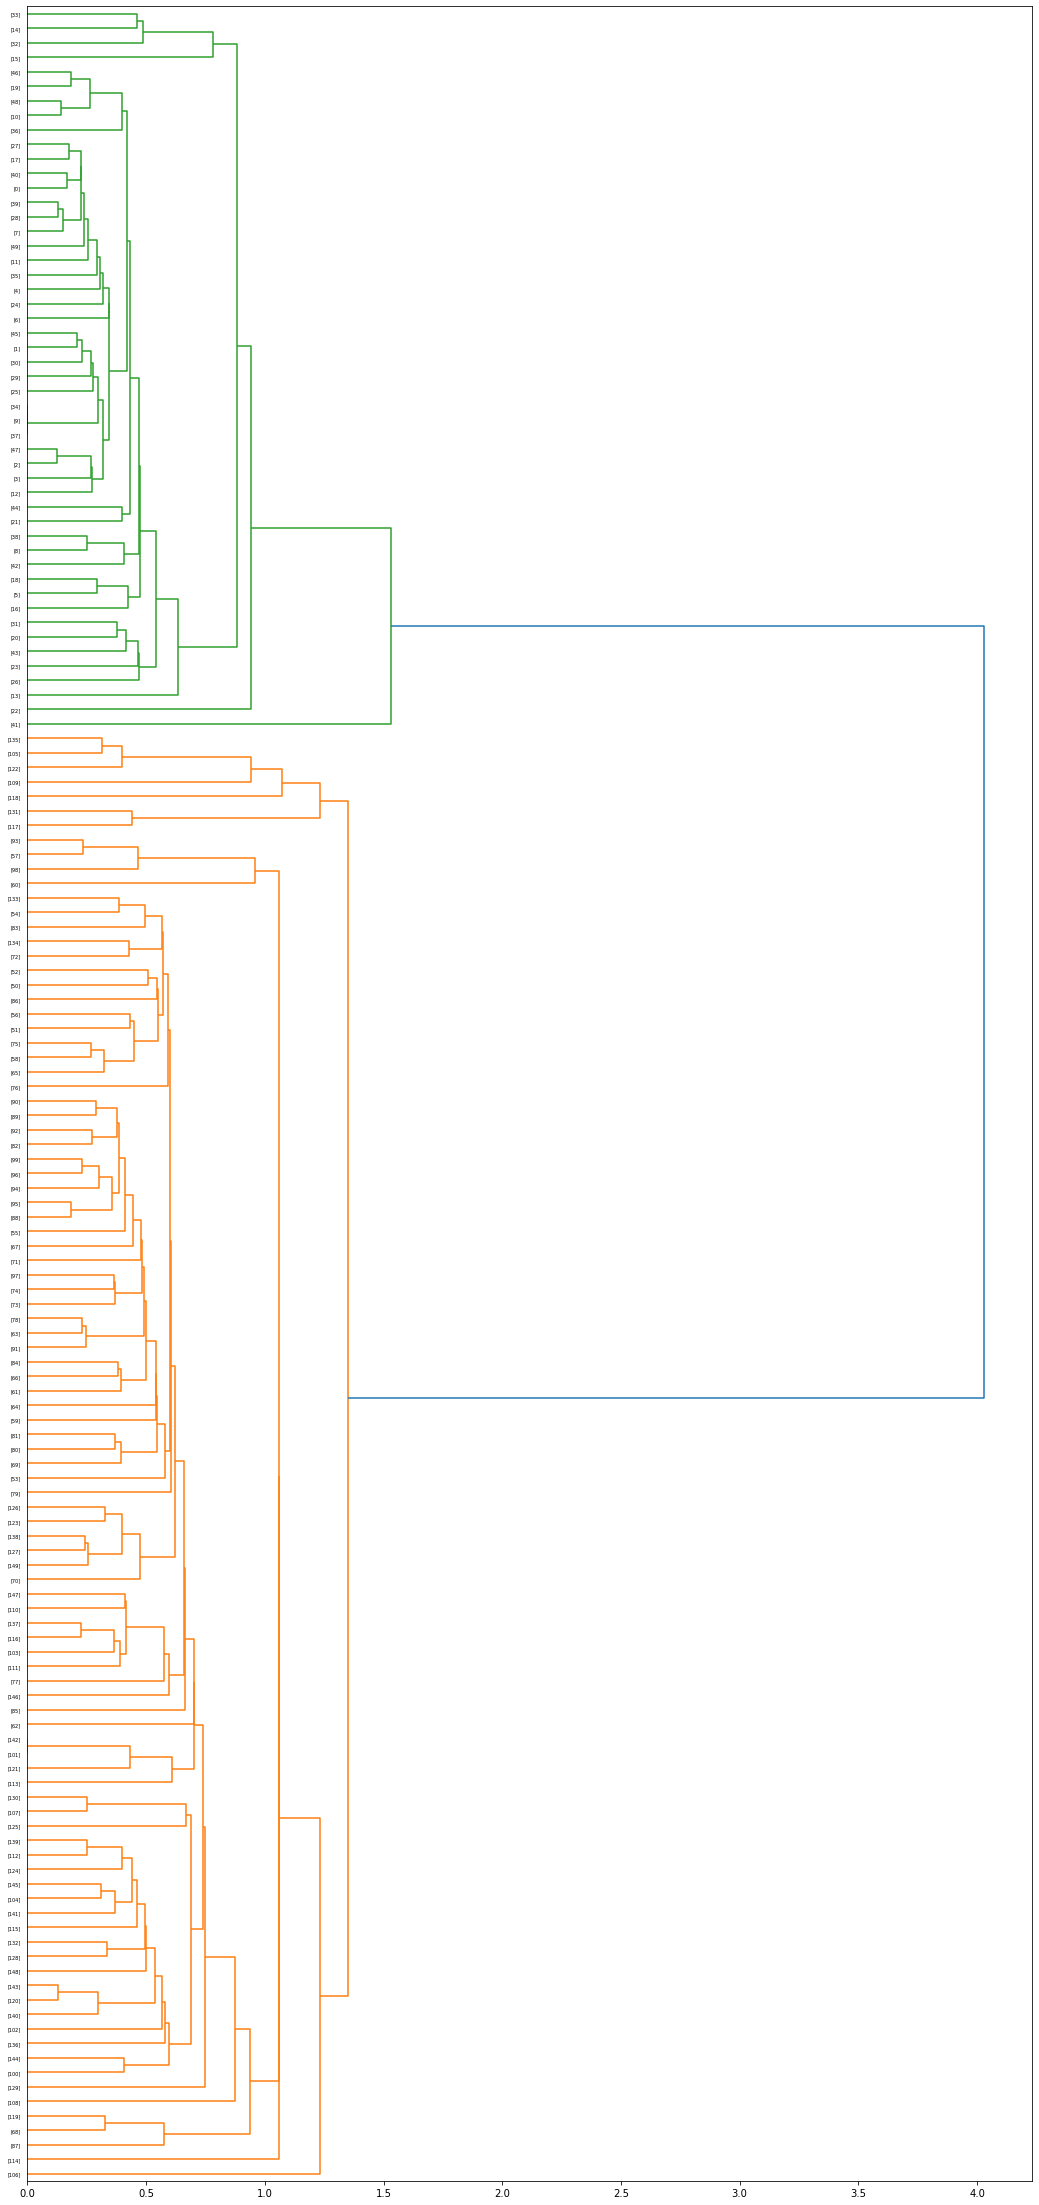

In [15]:
fig = pylab.figure(figsize=(18,40))
dendro = hierarchy.dendrogram(Z, leaf_label_func=(lambda id: '[%s]' %id), leaf_rotation=0,orientation = 'right')

## average

In [16]:
Z = hierarchy.linkage(D, 'average')
max_clust = 3
clusters = fcluster(Z, max_clust, criterion='maxclust')
silhouette_avg = silhouette_score(D, clusters)
silhouette_avg

0.5995663629245689

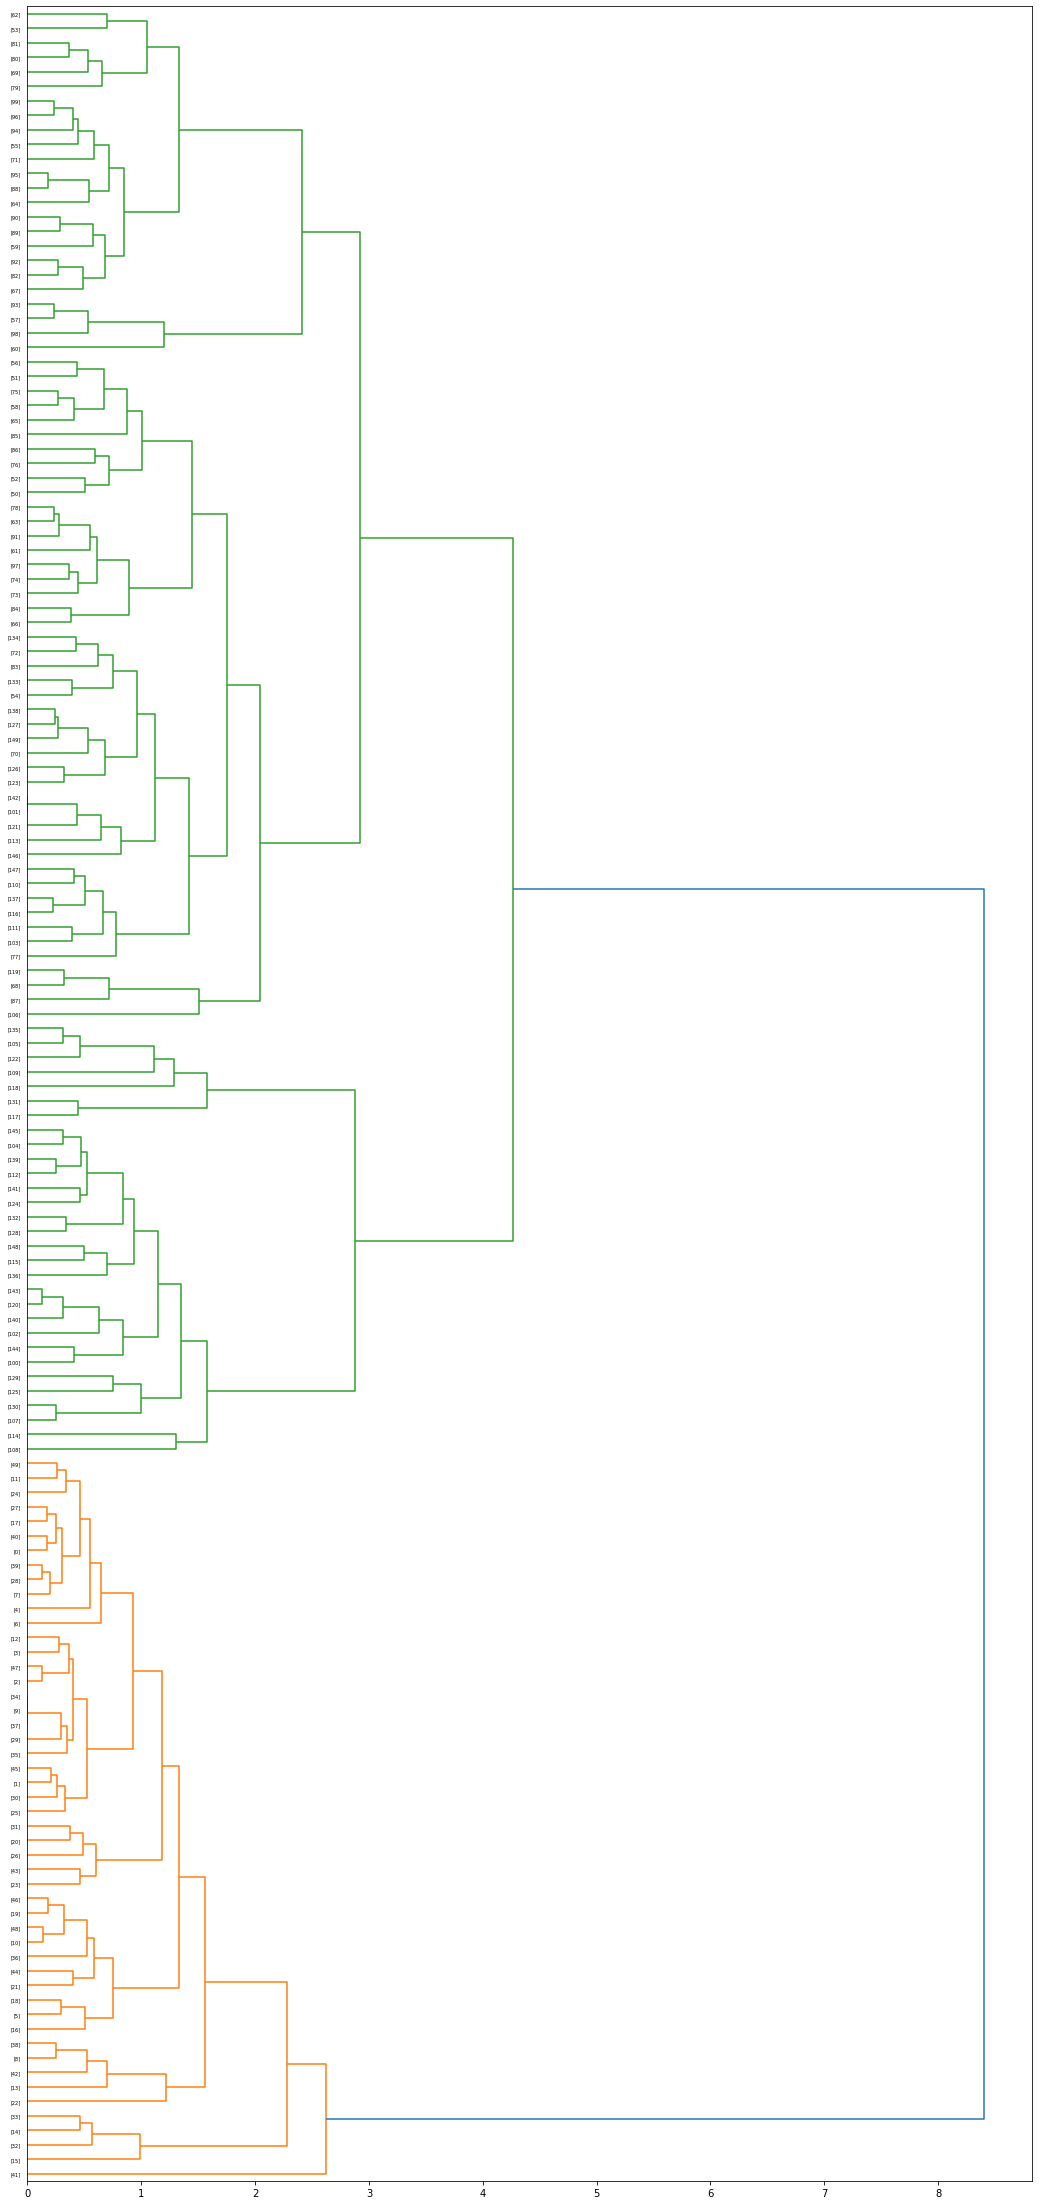

In [17]:
fig = pylab.figure(figsize=(18,40))
dendro = hierarchy.dendrogram(Z, leaf_label_func=(lambda id: '[%s]' %id), leaf_rotation=0,orientation = 'right')

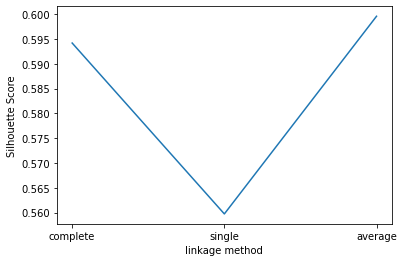

In [18]:
methods = ['complete', 'single', 'average']
scores = [0.5941680390317883, 0.5597396020599303, 0.5995663629245689]
plt.plot(methods, scores)
plt.xlabel('linkage method')
plt.ylabel('Silhouette Score')
plt.show()

In [19]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
SciPy_label        int32
dtype: object